Ukuran data -> X_train: (80, 4) | X_val: (20, 4)
Bobot awal: [0.5 0.5 0.5 0.5]
Bias awal: 0.5000

=== CEK BARIS PERTAMA TRAINING ===
Fitur (X1..X4): [5.1 3.5 1.4 0.2]
Target (y): 0.0
z = 5.6
Prediksi g(z) = 0.9963157601005641
deltaBias = 0.0073142853212969676
deltaTetha = [0.03730286 0.0256     0.01024    0.00146286]

histori akurasi evaluasi = [0.5  0.5  0.5  0.85 1.   1.   1.   1.   1.   1.   1.  ]

histori error evaluasi = [0.32757315 0.24575093 0.17454829 0.11833646 0.08084826 0.05516595
 0.03805487 0.02715046 0.02015802 0.01555023 0.01241942]

=== HASIL AKHIR ===
Akurasi Train akhir : 1.0000
Akurasi Val   akhir : 1.0000


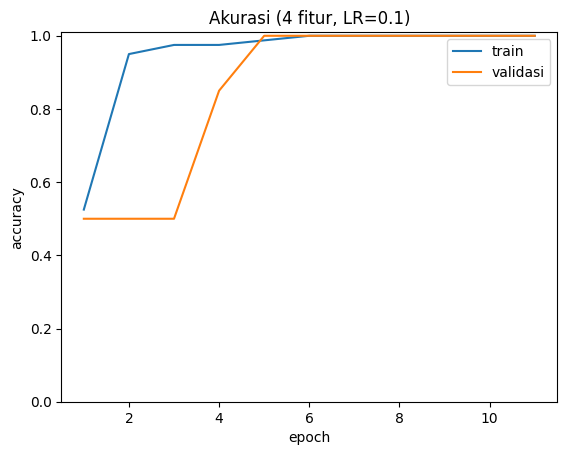

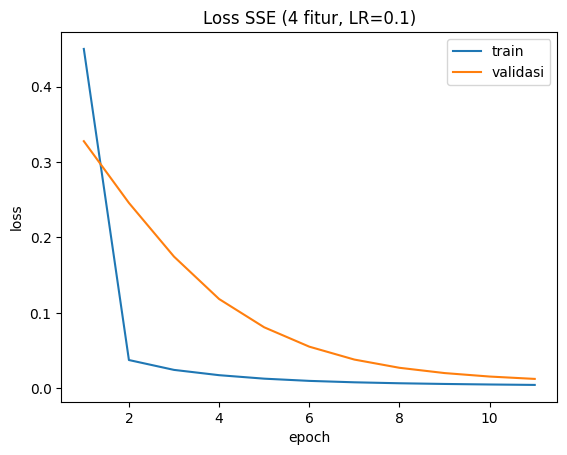


=== TABEL HASIL TRAINING ===
 Epoch  Training Accuracy  Eval Accuracy  Training Loss  Eval Loss  Training Benar  Eval Benar
     1             0.5250           0.50       0.449889   0.327573            42.0        10.0
     2             0.9500           0.50       0.037452   0.245751            76.0        10.0
     3             0.9750           0.50       0.024372   0.174548            78.0        10.0
     4             0.9750           0.85       0.017357   0.118336            78.0        17.0
     5             0.9875           1.00       0.012740   0.080848            79.0        20.0
     6             1.0000           1.00       0.009799   0.055166            80.0        20.0
     7             1.0000           1.00       0.007914   0.038055            80.0        20.0
     8             1.0000           1.00       0.006644   0.027150            80.0        20.0
     9             1.0000           1.00       0.005727   0.020158            80.0        20.0
    10             1

In [12]:
# ==========================================================
# Single Layer Perceptron - Findra Kartika Sari Dewi
# - Kelas: Setosa (0) vs Versicolor (1) [100 baris pertama]
# - Fitur: SepalLength, SepalWidth, PetalLength, PetalWidth
# - Split: Train 80 (40+40), Validasi 20 (10+10)
# - Loss : SSE = (pred - y)^2
# - Optim: SGD (update per-sampel)
# - Output: w, b, kurva akurasi/loss, tabel prediksi/label per epoch
# ==========================================================

import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 0) Baca data dari Excel & siapkan label 0/1
# ---------------------------------------------------------
iris = pd.read_excel("data_iris.xlsx")[:100].copy()

# Map Species -> Y {0,1}
species_map = {
    "Iris-setosa": 0.0, "setosa": 0.0,
    "Iris-versicolor": 1.0, "versicolor": 1.0
}
iris["Y"] = iris["Species"].map(species_map).astype(float)

# Pakai SEMUA 4 FITUR
FEATURES = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
X_all = iris[FEATURES].to_numpy(dtype=float)   # shape: (100, 4)
y_all = iris["Y"].to_numpy(dtype=float)        # shape: (100,)

# ---------------------------------------------------------
# 1) Pembagian data Train/Validasi 80:20 (seimbang per kelas)
#    - Train : 40 setosa + 40 versicolor = 80
#    - Val   : 10 setosa + 10 versicolor = 20
# ---------------------------------------------------------
X_set, y_set = X_all[:50], y_all[:50]          # 50 setosa
X_ver, y_ver = X_all[50:100], y_all[50:100]    # 50 versicolor

X_train = np.vstack([X_set[:40], X_ver[:40]])
y_train = np.hstack([y_set[:40], y_ver[:40]])
X_val   = np.vstack([X_set[40:], X_ver[40:]])
y_val   = np.hstack([y_set[40:], y_ver[40:]])

print("Ukuran data -> X_train:", X_train.shape, "| X_val:", X_val.shape)

# ---------------------------------------------------------
# 2) Fungsi-fungsi yang diminta
# ---------------------------------------------------------

def inisialisasi_bobot_bias(n_features: int):
    w = np.full(n_features, 0.5)   # semua bobot = 0.5
    b = 0.5                        # bias = 0.5
    return w, b

def dot_product(x_row: np.ndarray, w: np.ndarray, b: float) -> float: # DOT PRODUCT + bias: z = w · x + b
    return float(x_row @ w + b)

def sigmoid(z: float) -> float:
    return 1.0 / (1.0 + m.exp(-z))

def sse_error(pred: float, target: float) -> float:  # SSE=(g(z) - y)^2
    return (pred - target) ** 2

def perbarui_bobot_bias(w: np.ndarray, b: float, deltaTetha: np.ndarray, deltaBias: float, lr: float):
    w_new = w - lr * deltaTetha
    b_new = b - lr * deltaBias
    return w_new, b_new


# ---------------------------------------------------------
# 3) Fungsi-fungsi pembantu lain (evaluasi & gradien)
# ---------------------------------------------------------

def hitung_prediksi(X: np.ndarray, w: np.ndarray, b: float) -> np.ndarray: # Menghitung kolom Prediksi (g(z)) untuk banyak sampel sekaligus
    z = X @ w + b
    return 1.0 / (1.0 + np.exp(-z))

def pembulatan_prediksi(prediksi: np.ndarray) -> np.ndarray: #Membulatkan probabilitas menjadi label 0/1 dengan threshold 0.5.
    return (prediksi >= 0.5).astype(float)

def mean_sse_loss(prediksi: np.ndarray, y_true: np.ndarray) -> float: # Rata-rata SSE sesuai rumus dosen: (g(z) - y)^2
    return float(np.mean((prediksi - y_true) ** 2))

def akurasi(prediksi_bulat: np.ndarray, y_true: np.ndarray) -> float: #Akurasi = proporsi prediksi bulat (0/1) yang benar dibanding label sebenarnya.
    return float((prediksi_bulat == y_true).mean())

def hitung_delta(x: np.ndarray, prediksi: float, target: float): #Hitung deltaBias dan deltaTetha untuk SATU sampel,
    deltaTetha = 2 * (prediksi - target) * (1.0 - prediksi) * prediksi * x   # array: deltaTetha1, deltaTetha2, dst.
    deltaBias  = 2 * (prediksi - target) * (1.0 - prediksi) * prediksi            # skalar
    return deltaBias, deltaTetha

# ---------------------------------------------------------
# 4) Training loop
# ---------------------------------------------------------
n_fitur = X_train.shape[1]
w, b = inisialisasi_bobot_bias(n_fitur)   # inisialisasi bobot & bias (semua 0.5)

lr = 0.1        # learning rate
epochs = 11     # jumlah putaran belajar

hist_error_tr = np.zeros(epochs)
hist_error_va = np.zeros(epochs)
hist_akurasi_tr = np.zeros(epochs)
hist_akurasi_va = np.zeros(epochs)
hist_benar_tr = np.zeros(epochs)
hist_benar_va = np.zeros(epochs)
#n_val = len(x_val)
pred_tr = np.zeros(80)
# simpan histori bobot & bias tiap epoch
hist_w = []
hist_b = []

print(f"Bobot awal: {w}\nBias awal: {b:.4f}")

# ---------------------------------------------------------
# Cek delta untuk 1 baris pertama training
# ---------------------------------------------------------

# Ambil baris pertama dari X_train dan y_train
fitur_1 = X_train[0]
target_1 = y_train[0]

# Hitung z dan prediksi awal (pakai bobot & bias awal = 0.5 semua)
w_awal, b_awal = inisialisasi_bobot_bias(X_train.shape[1])
z_1 = dot_product(fitur_1, w_awal, b_awal)
prediksi_1 = sigmoid(z_1)

# Hitung deltaBias & deltaTetha
deltaBias_1, deltaTetha_1 = hitung_delta(fitur_1, prediksi_1, target_1)

# Tampilkan hasil
print("\n=== CEK BARIS PERTAMA TRAINING ===")
print("Fitur (X1..X4):", fitur_1)
print("Target (y):", target_1)
print("z =", z_1)
print("Prediksi g(z) =", prediksi_1)
print("deltaBias =", deltaBias_1)
print("deltaTetha =", deltaTetha_1)


# ### >>> NEW: wadah tabel prediksi per-epoch (80 baris per epoch, TRAIN)
pred_table_rows = []  # akan diisi dict: {'Epoch', 'IndexData', 'y_true', 'Prediksi', 'Prediksi_Bulat'}

for ep in range(epochs):
    for i in range(len(X_train)):
        x_i, y_i = X_train[i], y_train[i]

        if i == 79 and ep in range(11):   # ep = 0-10

            # --- BARIS KE-1: cetak SEBELUM update ---
           # print("\n=== BARIS KE-80 (SEBELUM update) ===")

            # simpan bobot & bias akhir epoch
            hist_w.append(w.copy())
            hist_b.append(b)


            z_i = dot_product(x_i, w, b)
            f_i = sigmoid(z_i)
            dB, dT = hitung_delta(x_i, f_i, y_i)

            '''
            print("Fitur (X1..X4):", x_i)
            print("Target (y):", y_i)
            print("z =", z_i)
            print("Prediksi g(z) =", f_i)
            print("deltaBias =", dB)
            print("deltaTetha =", dT)
            '''



        # --- alur normal untuk baris selain baris ke-2 di epoch 1 ---
        z_i = dot_product(x_i, w, b)
        f_i = sigmoid(z_i)
        dB, dT = hitung_delta(x_i, f_i, y_i)
        w, b = perbarui_bobot_bias(w, b, dT, dB, lr)

    # ### >>> NEW: isi tabel prediksi (TRAIN) untuk epoch ini
        pred_table_rows.append({
            "Epoch": ep + 1,
            "IndexData": i + 1,          # urutan 1..80
            "y_true": float(y_i),
            "Prediksi": float(f_i),
            "Prediksi_Bulat": (f_i >= 0.5)
        })

        pred_tr[i] = f_i


    # simpan bobot & bias akhir epoch
#    hist_w.append(w.copy())
#    hist_b.append(b)

 #   print("isi hist_w =", hist_w)
  #  print("isi hist_b =", hist_b)



    # --- Evaluasi di akhir epoch (pakai seluruh dataset) ---
    #pred_tr = hitung_prediksi(X_train, w, b)
    #pred_va = hitung_prediksi(X_val,   w, b)


    #print("isi pred_tr =", pred_tr)


    # ====== METRIK (pakai prediksi post-epoch) ======
    label_tr = pembulatan_prediksi(pred_tr)
    #label_va = pembulatan_prediksi(pred_va_all)

    hist_akurasi_tr[ep] = float((label_tr == y_train).mean())
    #hist_akurasi_va[ep] = float((label_va == y_val).mean())

    hist_error_tr[ep] = mean_sse_loss(pred_tr, y_train)
    #hist_error_va[ep] = mean_sse_loss(pred_va_all, y_val)

    hist_benar_tr[ep] = int((label_tr == y_train).sum())
    #hist_benar_va[ep] = int((label_va == y_val).sum())



pred_va_all = np.zeros((epochs, len(X_val)), dtype=float)
for ep in range(epochs):
    w_ep = hist_w[ep]
    b_ep = hist_b[ep]
    for j in range(len(X_val)):
        x_j = X_val[j]
        z_j = dot_product(x_j, w_ep, b_ep)
        pred_va_all[ep, j] = sigmoid(z_j)





    pred_va = pred_va_all[ep]                    # 1D: (len(X_val),)
    label_va = pembulatan_prediksi(pred_va)
    hist_akurasi_va[ep] = float((label_va == y_val).mean())
    hist_error_va[ep] = mean_sse_loss(pred_va, y_val)
    hist_benar_va[ep] = int((label_va == y_val).sum())
#print("\nisi pred_va_all =", pred_va_all)

print("\nhistori akurasi evaluasi =", hist_akurasi_va)
print("\nhistori error evaluasi =", hist_error_va)


# ---------------------------------------------------------
# 5) Hasil akhir
# ---------------------------------------------------------
print("\n=== HASIL AKHIR ===")
print(f"Akurasi Train akhir : {hist_akurasi_tr[-1]:.4f}")
print(f"Akurasi Val   akhir : {hist_akurasi_va[-1]:.4f}")

# ---------------------------------------------------------
# 6) Visualisasi kurva akurasi & loss
# ---------------------------------------------------------
'''
def plot_dual(y_train, y_val, title, ylabel, ylim=None):
    plt.figure()
    plt.plot(y_train, label="train")
    plt.plot(y_val,   label="validasi")
    plt.title(title)
    plt.xlabel("epoch")
    plt.ylabel(ylabel)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.legend()
    plt.show()
'''
def plot_dual(y_train, y_val, title, ylabel, ylim=None):
    x = np.arange(1, len(y_train) + 1)   # 1..epochs
    plt.figure()
    plt.plot(x, y_train, label="train")
    plt.plot(x, y_val,   label="validasi")
    plt.title(title)
    plt.xlabel("epoch")
    plt.ylabel(ylabel)
    if ylim is not None:
        plt.ylim(*ylim)
    # (opsional) tampilkan semua tick agar terlihat 1..epochs
    # plt.xticks(x)
    plt.legend()
    plt.show()


plot_dual(hist_akurasi_tr, hist_akurasi_va,  "Akurasi (4 fitur, LR=0.1)", "accuracy", ylim=(0, 1.01))
plot_dual(hist_error_tr, hist_error_va, "Loss SSE (4 fitur, LR=0.1)", "loss")





# ---------------------------------------------------------
# Setelah training loop selesai, buat tabel ringkasan hasil
# ---------------------------------------------------------
hasil_tabel = pd.DataFrame({
    "Epoch": np.arange(1, epochs+1),
    "Training Accuracy": hist_akurasi_tr,
    "Eval Accuracy": hist_akurasi_va,
    "Training Loss": hist_error_tr,
    "Eval Loss": hist_error_va,
    "Training Benar": hist_benar_tr,
    "Eval Benar": hist_benar_va
})

print("\n=== TABEL HASIL TRAINING ===")
print(hasil_tabel.to_string(index=False))

# ---------------------------------------------------------
# Buat tabel bobot & bias
# ---------------------------------------------------------
kolom_w = [f"w{i+1}" for i in range(len(hist_w[0]))]

tabel_wb = pd.DataFrame(hist_w, columns=kolom_w)
tabel_wb["Bias"] = hist_b
tabel_wb.insert(0, "Epoch", range(1, epochs+1))

print("\n=== TABEL BOBOT & BIAS AKHIR PER EPOCH ===")
print(tabel_wb.to_string(index=False))

# ---------------------------------------------------------
# ### >>> NEW: TABEL PREDIKSI & PEMBULATAN (80 data per epoch, TRAIN)
# ---------------------------------------------------------
#tabel_prediksi = pd.DataFrame(pred_table_rows, columns=["Epoch","IndexData","y_true","Prediksi","Prediksi_Bulat"])
#print("\n=== TABEL PREDIKSI & PEMBULATAN (TRAIN, SEMUA EPOCH) ===")
#print(tabel_prediksi.to_string(index=False))


Train: (80, 4) (80,)
Val  : (20, 4) (20,)
Bobot awal: [0.5 0.5 0.5 0.5]
Bias awal: 0.5000

=== CEK BARIS PERTAMA TRAINING ===
Fitur (X1..X4): [4.3 3.  1.1 0.1]
Target (y): 0.0
z = 4.75
Prediksi g(z) = 0.991422514586288
deltaBias = 0.016861939950394877
deltaTetha = [0.07250634 0.05058582 0.01854813 0.00168619]

histori akurasi evaluasi = [0.5 0.5 0.6 1.  1.  1.  1.  1.  1.  1.  1. ]

histori error evaluasi = [0.31538923 0.22154336 0.14228319 0.08706105 0.05290668 0.03299845
 0.02150235 0.01469135 0.01050832 0.00783981 0.00607286]

=== HASIL AKHIR ===
Akurasi Train akhir : 1.0000
Akurasi Val   akhir : 1.0000


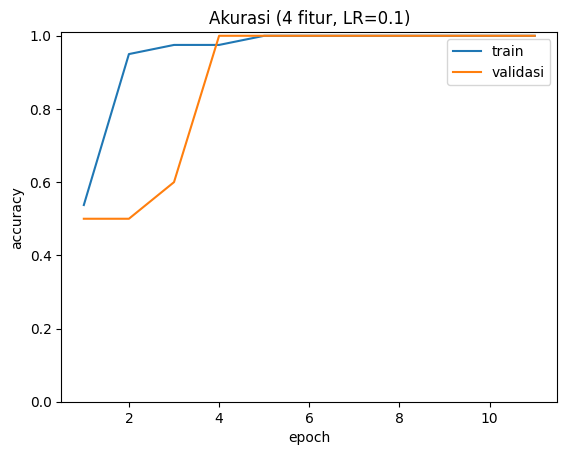

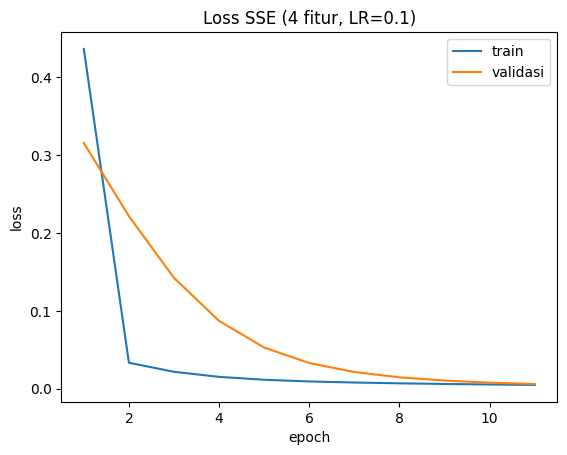


=== TABEL HASIL TRAINING ===
 Epoch  Training Accuracy  Eval Accuracy  Training Loss  Eval Loss  Training Benar  Eval Benar
     1             0.5375            0.5       0.436172   0.315389            43.0        10.0
     2             0.9500            0.5       0.033407   0.221543            76.0        10.0
     3             0.9750            0.6       0.021743   0.142283            78.0        12.0
     4             0.9750            1.0       0.015262   0.087061            78.0        20.0
     5             1.0000            1.0       0.011524   0.052907            80.0        20.0
     6             1.0000            1.0       0.009379   0.032998            80.0        20.0
     7             1.0000            1.0       0.007990   0.021502            80.0        20.0
     8             1.0000            1.0       0.006961   0.014691            80.0        20.0
     9             1.0000            1.0       0.006143   0.010508            80.0        20.0
    10             1

In [8]:
# ==========================================================
# Single Layer Perceptron - Findra Kartika Sari Dewi - Shuffle Data
# - Kelas: Setosa (0) vs Versicolor (1) [100 baris pertama]
# - Fitur: SepalLength, SepalWidth, PetalLength, PetalWidth
# - Split: Train 80 (40+40), Validasi 20 (10+10)
# - Loss : SSE = (pred - y)^2
# - Optim: SGD (update per-sampel)
# - Output: w, b, kurva akurasi/loss, tabel prediksi/label per epoch
# ==========================================================

import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# ---------------------------------------------------------
# 0) Baca data dari Excel & siapkan label 0/1
# ---------------------------------------------------------
iris = pd.read_excel("data_iris.xlsx")[:100].copy()

# Map Species -> Y {0,1}
species_map = {
    "Iris-setosa": 0.0, "setosa": 0.0,
    "Iris-versicolor": 1.0, "versicolor": 1.0
}
iris["Y"] = iris["Species"].map(species_map).astype(float)

# Pakai SEMUA 4 FITUR
FEATURES = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
X_all = iris[FEATURES].to_numpy(dtype=float)   # shape: (100, 4)
y_all = iris["Y"].to_numpy(dtype=float)        # shape: (100,)

# ---------------------------------------------------------
# 1) Pembagian data Train/Validasi 80:20 (seimbang per kelas)
#    - Train : 40 setosa + 40 versicolor = 80
#    - Val   : 10 setosa + 10 versicolor = 20
#    (dengan shuffle per kelas agar urutan acak)
# ---------------------------------------------------------

# Ambil data per kelas
X_set, y_set = X_all[:50], y_all[:50]          # 50 setosa
X_ver, y_ver = X_all[50:100], y_all[50:100]    # 50 versicolor

# Shuffle masing-masing kelas (pakai seed untuk konsistensi)
X_set, y_set = shuffle(X_set, y_set, random_state=42)
X_ver, y_ver = shuffle(X_ver, y_ver, random_state=42)

# Split Train/Val
X_train = np.vstack([X_set[:40], X_ver[:40]])
y_train = np.concatenate([y_set[:40], y_ver[:40]])

X_val   = np.vstack([X_set[40:], X_ver[40:]])
y_val   = np.concatenate([y_set[40:], y_ver[40:]])

# Opsional: shuffle lagi setelah digabung, supaya train tidak berurutan
#X_train, y_train = shuffle(X_train, y_train, random_state=42)
#X_val,   y_val   = shuffle(X_val,   y_val,   random_state=42)

print("Train:", X_train.shape, y_train.shape)
print("Val  :", X_val.shape, y_val.shape)

# ---------------------------------------------------------
# 2) Fungsi-fungsi yang diminta
# ---------------------------------------------------------

def inisialisasi_bobot_bias(n_features: int):
    w = np.full(n_features, 0.5)   # semua bobot = 0.5
    b = 0.5                        # bias = 0.5
    return w, b

def dot_product(x_row: np.ndarray, w: np.ndarray, b: float) -> float: # DOT PRODUCT + bias: z = w · x + b
    return float(x_row @ w + b)

def sigmoid(z: float) -> float:
    return 1.0 / (1.0 + m.exp(-z))

def sse_error(pred: float, target: float) -> float:  # SSE=(g(z) - y)^2
    return (pred - target) ** 2

def perbarui_bobot_bias(w: np.ndarray, b: float, deltaTetha: np.ndarray, deltaBias: float, lr: float):
    w_new = w - lr * deltaTetha
    b_new = b - lr * deltaBias
    return w_new, b_new


# ---------------------------------------------------------
# 3) Fungsi-fungsi pembantu lain (evaluasi & gradien)
# ---------------------------------------------------------

def hitung_prediksi(X: np.ndarray, w: np.ndarray, b: float) -> np.ndarray: # Menghitung kolom Prediksi (g(z)) untuk banyak sampel sekaligus
    z = X @ w + b
    return 1.0 / (1.0 + np.exp(-z))

def pembulatan_prediksi(prediksi: np.ndarray) -> np.ndarray: #Membulatkan probabilitas menjadi label 0/1 dengan threshold 0.5.
    return (prediksi >= 0.5).astype(float)

def mean_sse_loss(prediksi: np.ndarray, y_true: np.ndarray) -> float: # Rata-rata SSE sesuai rumus dosen: (g(z) - y)^2
    return float(np.mean((prediksi - y_true) ** 2))

def akurasi(prediksi_bulat: np.ndarray, y_true: np.ndarray) -> float: #Akurasi = proporsi prediksi bulat (0/1) yang benar dibanding label sebenarnya.
    return float((prediksi_bulat == y_true).mean())

def hitung_delta(x: np.ndarray, prediksi: float, target: float): #Hitung deltaBias dan deltaTetha untuk SATU sampel,
    deltaTetha = 2 * (prediksi - target) * (1.0 - prediksi) * prediksi * x   # array: deltaTetha1, deltaTetha2, dst.
    deltaBias  = 2 * (prediksi - target) * (1.0 - prediksi) * prediksi            # skalar
    return deltaBias, deltaTetha

# ---------------------------------------------------------
# 4) Training loop
# ---------------------------------------------------------
n_fitur = X_train.shape[1]
w, b = inisialisasi_bobot_bias(n_fitur)   # inisialisasi bobot & bias (semua 0.5)

lr = 0.1        # learning rate
epochs = 11     # jumlah putaran belajar

hist_error_tr = np.zeros(epochs)
hist_error_va = np.zeros(epochs)
hist_akurasi_tr = np.zeros(epochs)
hist_akurasi_va = np.zeros(epochs)
hist_benar_tr = np.zeros(epochs)
hist_benar_va = np.zeros(epochs)
#n_val = len(X_val)
pred_tr = np.zeros(80)
# simpan histori bobot & bias tiap epoch
hist_w = []
hist_b = []

print(f"Bobot awal: {w}\nBias awal: {b:.4f}")

# ---------------------------------------------------------
# Cek delta untuk 1 baris pertama training
# ---------------------------------------------------------

# Ambil baris pertama dari X_train dan y_train
fitur_1 = X_train[0]
target_1 = y_train[0]

# Hitung z dan prediksi awal (pakai bobot & bias awal = 0.5 semua)
w_awal, b_awal = inisialisasi_bobot_bias(X_train.shape[1])
z_1 = dot_product(fitur_1, w_awal, b_awal)
prediksi_1 = sigmoid(z_1)

# Hitung deltaBias & deltaTetha
deltaBias_1, deltaTetha_1 = hitung_delta(fitur_1, prediksi_1, target_1)

# Tampilkan hasil
print("\n=== CEK BARIS PERTAMA TRAINING ===")
print("Fitur (X1..X4):", fitur_1)
print("Target (y):", target_1)
print("z =", z_1)
print("Prediksi g(z) =", prediksi_1)
print("deltaBias =", deltaBias_1)
print("deltaTetha =", deltaTetha_1)


# ### >>> NEW: wadah tabel prediksi per-epoch (80 baris per epoch, TRAIN)
pred_table_rows = []  # akan diisi dict: {'Epoch', 'IndexData', 'y_true', 'Prediksi', 'Prediksi_Bulat'}

for ep in range(epochs):
    for i in range(len(X_train)):
        x_i, y_i = X_train[i], y_train[i]

        if i == 79 and ep in range(11):   # ep = 0-10

            # --- BARIS KE-1: cetak SEBELUM update ---
           # print("\n=== BARIS KE-80 (SEBELUM update) ===")

            # simpan bobot & bias akhir epoch
            hist_w.append(w.copy())
            hist_b.append(b)


            z_i = dot_product(x_i, w, b)
            f_i = sigmoid(z_i)
            dB, dT = hitung_delta(x_i, f_i, y_i)

            '''
            print("Fitur (X1..X4):", x_i)
            print("Target (y):", y_i)
            print("z =", z_i)
            print("Prediksi g(z) =", f_i)
            print("deltaBias =", dB)
            print("deltaTetha =", dT)
            '''



        # --- alur normal untuk baris selain baris ke-2 di epoch 1 ---
        z_i = dot_product(x_i, w, b)
        f_i = sigmoid(z_i)
        dB, dT = hitung_delta(x_i, f_i, y_i)
        w, b = perbarui_bobot_bias(w, b, dT, dB, lr)

    # ### >>> NEW: isi tabel prediksi (TRAIN) untuk epoch ini
        pred_table_rows.append({
            "Epoch": ep + 1,
            "IndexData": i + 1,          # urutan 1..80
            "y_true": float(y_i),
            "Prediksi": float(f_i),
            "Prediksi_Bulat": (f_i >= 0.5)
        })

        pred_tr[i] = f_i


    # simpan bobot & bias akhir epoch
#    hist_w.append(w.copy())
#    hist_b.append(b)

 #   print("isi hist_w =", hist_w)
  #  print("isi hist_b =", hist_b)



    # --- Evaluasi di akhir epoch (pakai seluruh dataset) ---
    #pred_tr = hitung_prediksi(X_train, w, b)
    #pred_va = hitung_prediksi(X_val,   w, b)


    #print("isi pred_tr =", pred_tr)


    # ====== METRIK (pakai prediksi post-epoch) ======
    label_tr = pembulatan_prediksi(pred_tr)
    #label_va = pembulatan_prediksi(pred_va_all)

    hist_akurasi_tr[ep] = float((label_tr == y_train).mean())
    #hist_akurasi_va[ep] = float((label_va == y_val).mean())

    hist_error_tr[ep] = mean_sse_loss(pred_tr, y_train)
    #hist_error_va[ep] = mean_sse_loss(pred_va_all, y_val)

    hist_benar_tr[ep] = int((label_tr == y_train).sum())
    #hist_benar_va[ep] = int((label_va == y_val).sum())



pred_va_all = np.zeros((epochs, len(X_val)), dtype=float)
for ep in range(epochs):
    w_ep = hist_w[ep]
    b_ep = hist_b[ep]
    for j in range(len(X_val)):
        x_j = X_val[j]
        z_j = dot_product(x_j, w_ep, b_ep)
        pred_va_all[ep, j] = sigmoid(z_j)





    pred_va = pred_va_all[ep]                    # 1D: (len(X_val),)
    label_va = pembulatan_prediksi(pred_va)
    hist_akurasi_va[ep] = float((label_va == y_val).mean())
    hist_error_va[ep] = mean_sse_loss(pred_va, y_val)
    hist_benar_va[ep] = int((label_va == y_val).sum())
#print("\nisi pred_va_all =", pred_va_all)

print("\nhistori akurasi evaluasi =", hist_akurasi_va)
print("\nhistori error evaluasi =", hist_error_va)


# ---------------------------------------------------------
# 5) Hasil akhir
# ---------------------------------------------------------
print("\n=== HASIL AKHIR ===")
print(f"Akurasi Train akhir : {hist_akurasi_tr[-1]:.4f}")
print(f"Akurasi Val   akhir : {hist_akurasi_va[-1]:.4f}")

# ---------------------------------------------------------
# 6) Visualisasi kurva akurasi & loss
# ---------------------------------------------------------
'''
def plot_dual(y_train, y_val, title, ylabel, ylim=None):
    plt.figure()
    plt.plot(y_train, label="train")
    plt.plot(y_val,   label="validasi")
    plt.title(title)
    plt.xlabel("epoch")
    plt.ylabel(ylabel)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.legend()
    plt.show()
'''
def plot_dual(y_train, y_val, title, ylabel, ylim=None):
    x = np.arange(1, len(y_train) + 1)   # 1..epochs
    plt.figure()
    plt.plot(x, y_train, label="train")
    plt.plot(x, y_val,   label="validasi")
    plt.title(title)
    plt.xlabel("epoch")
    plt.ylabel(ylabel)
    if ylim is not None:
        plt.ylim(*ylim)
    # (opsional) tampilkan semua tick agar terlihat 1..epochs
    # plt.xticks(x)
    plt.legend()
    plt.show()


plot_dual(hist_akurasi_tr, hist_akurasi_va,  "Akurasi (4 fitur, LR=0.1)", "accuracy", ylim=(0, 1.01))
plot_dual(hist_error_tr, hist_error_va, "Loss SSE (4 fitur, LR=0.1)", "loss")





# ---------------------------------------------------------
# Setelah training loop selesai, buat tabel ringkasan hasil
# ---------------------------------------------------------
hasil_tabel = pd.DataFrame({
    "Epoch": np.arange(1, epochs+1),
    "Training Accuracy": hist_akurasi_tr,
    "Eval Accuracy": hist_akurasi_va,
    "Training Loss": hist_error_tr,
    "Eval Loss": hist_error_va,
    "Training Benar": hist_benar_tr,
    "Eval Benar": hist_benar_va
})

print("\n=== TABEL HASIL TRAINING ===")
print(hasil_tabel.to_string(index=False))

# ---------------------------------------------------------
# Buat tabel bobot & bias
# ---------------------------------------------------------
kolom_w = [f"w{i+1}" for i in range(len(hist_w[0]))]

tabel_wb = pd.DataFrame(hist_w, columns=kolom_w)
tabel_wb["Bias"] = hist_b
tabel_wb.insert(0, "Epoch", range(1, epochs+1))

print("\n=== TABEL BOBOT & BIAS AKHIR PER EPOCH ===")
print(tabel_wb.to_string(index=False))

# ---------------------------------------------------------
# ### >>> NEW: TABEL PREDIKSI & PEMBULATAN (80 data per epoch, TRAIN)
# ---------------------------------------------------------
#tabel_prediksi = pd.DataFrame(pred_table_rows, columns=["Epoch","IndexData","y_true","Prediksi","Prediksi_Bulat"])
#print("\n=== TABEL PREDIKSI & PEMBULATAN (TRAIN, SEMUA EPOCH) ===")
#print(tabel_prediksi.to_string(index=False))
